In [20]:
### import libraries and functions ###
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(chisq.posthoc.test)

source('general_functions.R')

In [21]:
### load questionnaire data ###
# onboarding questionnaires
data_onboarding_groupassignment <- readRDS("data/questionnaires/data_onboarding_groupassignment.rds")
data_onboarding_baseline <- readRDS("data/questionnaires/data_onboarding_baseline.rds")
data_onboarding_transparency <- readRDS("data/questionnaires/data_onboarding_transparency.rds")
data_onboarding_control <- readRDS("data/questionnaires/data_onboarding_control.rds")
data_onboarding_both <- readRDS("data/questionnaires/data_onboarding_both.rds")

# pre and post questionnaires
data_startq <- readRDS("data/questionnaires/data_preq.rds")
data_postq <- readRDS("data/questionnaires/data_postq.rds")

In [22]:
### load app data ###
users <- readRDS("data/app/users.rds")

In [23]:
### Participation Rates. Amount of participants that ... ###

# For each stage, the participation rates depending on the four conditions are calculated

## ... showed interest in the study
n_assigned_ba <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 1))
n_assigned_tr <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 2))
n_assigned_co <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 3))
n_assigned_bo <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 4))

# ... completed the onboarding questionnaire
n_onboarding_finished_ba <- nrow(data_onboarding_baseline %>% filter(FINISHED == 1))
n_onboarding_finished_tr <- nrow(data_onboarding_transparency %>% filter(FINISHED == 1))
n_onboarding_finished_co <- nrow(data_onboarding_control %>% filter(FINISHED == 1))
n_onboarding_finished_bo <- nrow(data_onboarding_both %>% filter(FINISHED == 1))

# ... installed the app
n_appinst_ba = nrow(users %>% filter(condition=="baseline"))
n_appinst_tr = nrow(users %>% filter(condition=="transparency"))
n_appinst_co = nrow(users %>% filter(condition=="control"))
n_appinst_bo = nrow(users %>% filter(condition=="both"))

# ... completed the pre questionnaire
n_started_ba <- nrow(data_startq %>% filter(condition == "baseline"))
n_started_tr <- nrow(data_startq %>% filter(condition == "transparency"))
n_started_co <- nrow(data_startq %>% filter(condition == "control"))
n_started_bo <- nrow(data_startq %>% filter(condition == "both"))

# ...  kept app installed for at least one day
n_day1_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(1)))
n_day1_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(1)))
n_day1_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(1)))
n_day1_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(1)))

# ... Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))

# ... completed the post questionnaire
n_finished_ba <- nrow(data_postq %>% filter(condition == "baseline")) 
n_finished_tr <- nrow(data_postq %>% filter(condition == "transparency"))
n_finished_co <- nrow(data_postq %>% filter(condition == "control"))
n_finished_bo <- nrow(data_postq %>% filter(condition == "both"))

In [24]:
# Table 3
df_table3 <- data.frame(
  baseline_n = c(n_assigned_ba,n_onboarding_finished_ba,n_appinst_ba,n_day1_ba,n_day6_ba),
  baseline_perc = c(1,n_onboarding_finished_ba/n_assigned_ba,n_appinst_ba/n_onboarding_finished_ba,n_day1_ba/n_appinst_ba,n_day6_ba/n_day1_ba),
  transparency_n = c(n_assigned_tr,n_onboarding_finished_tr,n_appinst_tr,n_day1_tr,n_day6_tr),
  transparency_perc = c(1,n_onboarding_finished_tr/n_assigned_tr,n_appinst_tr/n_onboarding_finished_tr,n_day1_tr/n_appinst_tr,n_day6_tr/n_day1_tr),
  control_n = c(n_assigned_co,n_onboarding_finished_co,n_appinst_co,n_day1_co,n_day6_co),
  control_perc = c(1,n_onboarding_finished_co/n_assigned_co,n_appinst_co/n_onboarding_finished_co,n_day1_co/n_appinst_co,n_day6_co/n_day1_co),
  both_n = c(n_assigned_bo,n_onboarding_finished_bo,n_appinst_bo,n_day1_bo,n_day6_bo),
  both_perc = c(1,n_onboarding_finished_bo/n_assigned_bo,n_appinst_bo/n_onboarding_finished_bo,n_day1_bo/n_appinst_bo,n_day6_bo/n_day1_bo),
  total_n = c(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo,
              n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo,
              n_appinst_ba+n_appinst_tr+n_appinst_co+n_appinst_bo,
              n_day1_ba+n_day1_tr+n_day1_co+n_day1_bo,
              n_day6_ba+n_day6_tr+n_day6_co+n_day6_bo),
  total_perc = c(1,
                 (n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo)/(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo),
                 (n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr)/(n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo),
                 (n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)/(n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr),
                 (n_day6_ba+n_day6_bo+n_day6_co+n_day6_tr)/(n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)
                 )
  )

View(df_table3)

baseline_n,baseline_perc,transparency_n,transparency_perc,control_n,control_perc,both_n,both_perc,total_n,total_perc
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
322,1.0000000,321,1.0000000,322,1.0000000,321,1.0000000,1286,1.0000000
56,0.1739130,57,0.1775701,51,0.1583851,63,0.1962617,227,0.1765163
38,0.6785714,27,0.4736842,43,0.8431373,42,0.6666667,150,0.6607930
29,0.7631579,23,0.8518519,38,0.8837209,38,0.9047619,128,0.8533333
29,1.0000000,23,1.0000000,37,0.9736842,37,0.9736842,126,0.9843750


In [25]:
### Tests: Differences in participation and dropout between the four study conditions ###

## Interst in Study -> Indicated Participation
mat_onboarding <- matrix(c(n_onboarding_finished_ba, 
                           n_onboarding_finished_tr,
                           n_onboarding_finished_co,
                           n_onboarding_finished_bo,
                        max(0,n_assigned_ba-n_onboarding_finished_ba), 
                        max(0,n_assigned_tr-n_onboarding_finished_tr),
                        max(0,n_assigned_co-n_onboarding_finished_co),
                        max(0,n_assigned_bo-n_onboarding_finished_bo)
                ), ncol=2)
colnames(mat_onboarding) <- c("Onboarded","Aborted")
row.names(mat_onboarding) <- c("baseline","transparency","control","both")
test_onboarding <- chisq.test(as.table(mat_onboarding), correct = FALSE)
print(test_onboarding)


	Pearson's Chi-squared test

data:  as.table(mat_onboarding)
X-squared = 1.6067, df = 3, p-value = 0.6579



In [26]:
## Indicated Participation -> App Installed
mat_onbq_appinst <- matrix(c(n_appinst_ba, 
                        n_appinst_tr,
                        n_appinst_co,
                        n_appinst_bo,
                        max(0,n_onboarding_finished_ba-n_appinst_ba), 
                        max(0,n_onboarding_finished_tr-n_appinst_tr),
                        max(0,n_onboarding_finished_co-n_appinst_co),
                        max(0,n_onboarding_finished_bo-n_appinst_bo)
), ncol=2)
colnames(mat_onbq_appinst) <- c("App Installed","App Not Installed")
row.names(mat_onbq_appinst) <- c("baseline","transparency","control","both")

chi_sq_test("Onboarding Q finished -> App Inst", mat_onbq_appinst)


	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 16.557, df = 3, p-value = 0.0008716

[1] "Onboarding Q finished -> App Inst : Significant relation found with p= 0.000871641628754211"
[1] "Onboarding Q finished -> App Inst : Variables in the following table whose magnitude is higher than -2.73436878653318 occured significantly more/less often"
     Dimension     Value App Installed App Not Installed
1     baseline Residuals     0.3237713        -0.3237713
2     baseline  p values     1.0000000         1.0000000
3 transparency Residuals    -3.4479014         3.4479014
4 transparency  p values     0.0045200         0.0045200
5      control Residuals     3.1236959        -3.1236959
6      control  p values     0.0142880         0.0142880
7         both Residuals     0.1158535        -0.1158535
8         both  p values     1.0000000         1.0000000


In [27]:
## App Installed -> Kept app installed for at least one day
mat_inst_day1 <- matrix(c(n_day1_ba, 
                          n_day1_tr,
                          n_day1_co,
                          n_day1_bo,
                          max(0,n_appinst_ba-n_day1_ba), 
                          max(0,n_appinst_tr-n_day1_tr),
                          max(0,n_appinst_co-n_day1_co),
                          max(0,n_appinst_bo-n_day1_bo)
), ncol=2)
colnames(mat_inst_day1) <- c("App 1+ day","App less than 1 day")
row.names(mat_inst_day1) <- c("baseline","transparency","control","both")
test_inst_day1 <- chisq.test(as.table(mat_inst_day1), correct = FALSE)
print(test_inst_day1)


Warning message in chisq.test(as.table(mat_inst_day1), correct = FALSE):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  as.table(mat_inst_day1)
X-squared = 3.6742, df = 3, p-value = 0.2989



In [28]:
## Kept app installed for at least one day -> Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))
mat_day1_day6 <- matrix(c(n_day6_ba, 
                          n_day6_tr,
                          n_day6_co,
                          n_day6_bo,
                          max(0,n_day1_ba-n_day6_ba), 
                          max(0,n_day1_tr-n_day6_tr),
                          max(0,n_day1_co-n_day6_co),
                          max(0,n_day1_bo-n_day6_bo)
), ncol=2)
colnames(mat_day1_day6) <- c("App 6+ day","App less than 6 day")
row.names(mat_day1_day6) <- c("baseline","transparency","control","both")

chi_sq_test("App min. 1 Tag -> App für mind. 6 Tage behalten",mat_day1_day6)

Warning message in chisq.test(as.table(mat), correct = FALSE):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 1.3901, df = 3, p-value = 0.7078

[1] "App min. 1 Tag -> App für mind. 6 Tage behalten : No significant relation found"


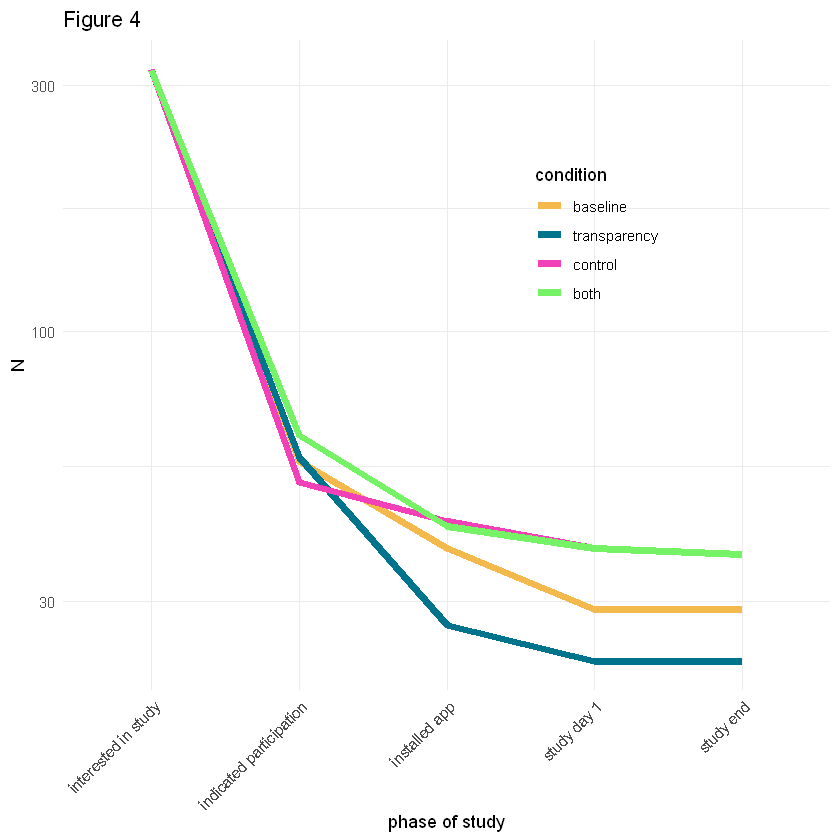

In [29]:
## Chart: Study Progress (Figure 4)
df_studyprogress <- data.frame(studyprogress = factor(c("interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",                                 
                                    "study end",
                                    "study end",
                                    "study end",
                                    "study end"
                                    ), levels=c("interested in study","indicated participation","installed app","study day 1","study end")), # this defines the order on the x axis
                 condition = factor(c("baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both"),levels=c("baseline","transparency","control","both")),
                 N = c(n_assigned_ba,
                       n_assigned_tr,
                       n_assigned_co,
                       n_assigned_bo,
                       n_onboarding_finished_ba,
                       n_onboarding_finished_tr,
                       n_onboarding_finished_co,
                       n_onboarding_finished_bo,
                       n_appinst_ba,
                       n_appinst_tr,
                       n_appinst_co,
                       n_appinst_bo,
                       n_day1_ba,
                       n_day1_tr,
                       n_day1_co,
                       n_day1_bo,                
                       n_day6_ba,
                       n_day6_tr,
                       n_day6_co,
                       n_day6_bo
                       )
)

ggplot(
  data=data.frame(df_studyprogress), 
  aes(x = studyprogress, y = N, color = condition, group=condition)
  ) + 
  geom_line(size = 2)+
  scale_color_manual(values=c('#f3b94d','#00748d','#F241B8','#76F266'))+
  theme_minimal()+
  labs(x="phase of study",y="N", title="Figure 4")+
  scale_y_continuous(trans='log10') +
  theme(
    axis.text.x = element_text(angle = 45, hjust=1),
    legend.position = c(.7, .7)
    )